# S03 T01 -  Visualització gràfica d'un dataset

In [1]:
# Import of basic modules to do the data exploration and data visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv("DelayedFlights.csv", index_col=0)

## Exercici 1

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

    Una variable categòrica (UniqueCarrier)
    Una variable numèrica (ArrDelay)
    Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
    Dues variables numèriques (ArrDelay i DepDelay)
    Tres variables (ArrDelay, DepDelay i UniqueCarrier)
    Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

### One categorical variable (UniqueCarrier)

Plot the total numbers of flights of each carrier using a bar plot

In [3]:
# Total of flights of each carier
unique_carrier = df["UniqueCarrier"].value_counts()

Bar plot with the 10 carriers with most flights with **Matplotlib**

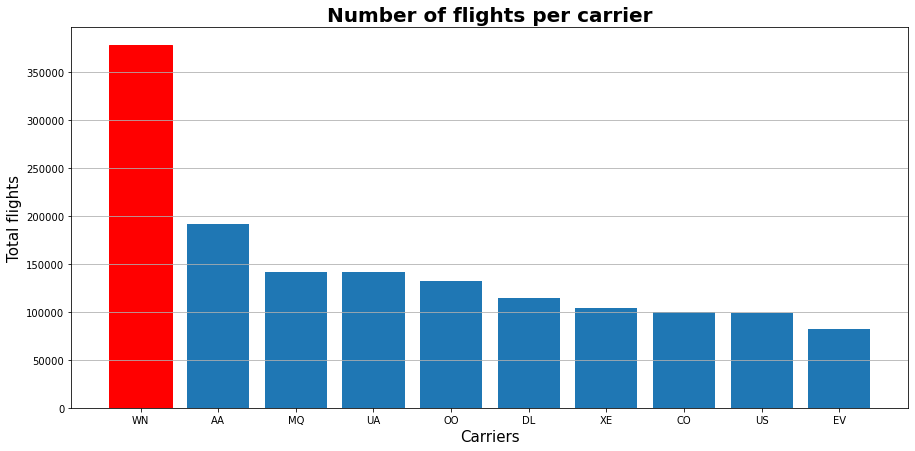

In [4]:
# Bar plot with the 10 carriers with most flights

fig = plt.figure(figsize=(15,7))

ax = fig.add_subplot()

ax.set_title("Number of flights per carrier", fontsize="20", weight="bold")

ax.bar(unique_carrier.index[:10], unique_carrier.values[:10])

ax.get_children()[0].set_color("r")

ax.grid(axis="y")

ax.set_xlabel("Carriers", fontsize="15")

ax.set_ylabel("Total flights", fontsize="15")

plt.savefig('Fig 01. Number of flights per carrier Bar plot - Matplotlib.png')

plt.show()


Donut plot with **Matplotlib**

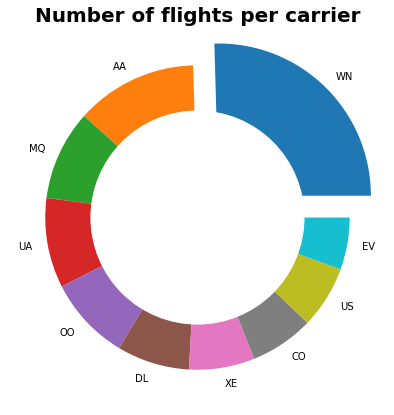

In [5]:
# Donut plot with the 10 carriers with most flights

fig = plt.figure(figsize=(15,7))

ax = fig.add_subplot()

ax.set_title("Number of flights per carrier", fontsize="20", weight="bold")

myexplode = [0.2] + [0]*9

ax.pie(unique_carrier.values[:10], labels = unique_carrier.index[:10], explode = myexplode)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.savefig('Fig 02. Number of flights per carrier Donut plot - Matplotlib.png')

plt.show()

### One numerical variable (ArrDelay)

This is a plot to show the number of flights in different delay ranges. I divided the ArrDelay column in different bins, each one representing 15 minutes of delay. The first bin is for flights that have a negative arrival delay, which means they landed before the scheduled time.

Bar plot with the number of flights in different delay ranges with **Matplotlib**

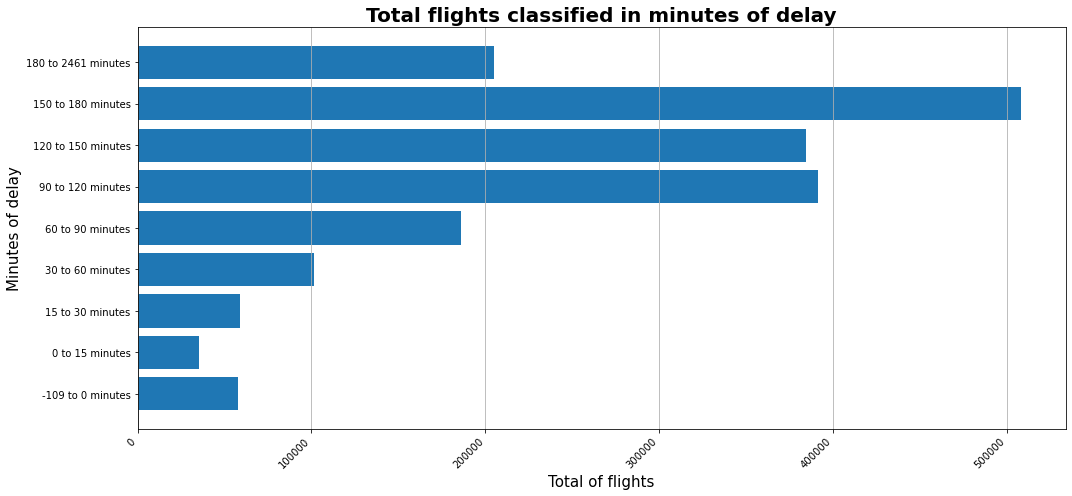

In [6]:
df2 = pd.cut(df["ArrDelay"], bins=[df["ArrDelay"].min(), 0, 15, 30, 60, 90, 120, 150, 180, df["ArrDelay"].max()]).value_counts()

fig = plt.figure(figsize=(15,7))

ax = fig.add_subplot()
ax.set_title("Total flights classified in minutes of delay", fontsize="20", weight="bold")

labels = ["{} to {} minutes".format(int(value.left), int(value.right)) for value in df2.sort_index().index.values]

ax.barh(labels , df2.sort_index(ascending=False))

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment="right")

ax.set_xlabel("Total of flights", fontsize="15")

ax.set_ylabel("Minutes of delay", fontsize="15")

plt.grid(axis="x")

plt.tight_layout()

plt.savefig('Fig 03. Total flights classified in minutes of delay - Bar plot.png')

plt.show()

Density plot to show the distribution of the numeric variable ArrDelay with **seaborn**

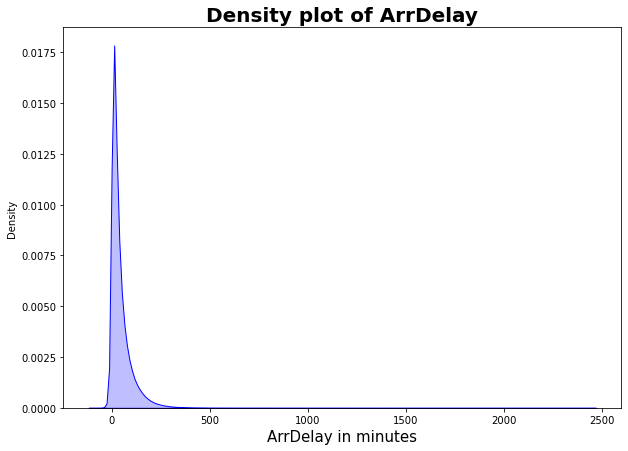

In [7]:
fig, ax = plt.subplots(figsize=(10,7))

ax = sns.kdeplot(df["ArrDelay"], shade = True, color="b")

ax.set_title("Density plot of ArrDelay", fontsize="20", weight="bold")

ax.set_xlabel("ArrDelay in minutes", fontsize="15")

plt.savefig('Fig 04. Density plot of ArrDelay.png')

plt.show()

### One numerical variable and one categorical (ArrDelay i UniqueCarrier)

With these two variables I want to plot different informations:

- ArrDelay mean for each carrier
- Sum of all ArrDealy minutes for carrier
- ArrDelay mean per month of each carrier

ArrDelay mean for each carrier **Matplotlib**

In [8]:
arrdelay_mean = df[["UniqueCarrier", "ArrDelay"]].groupby("UniqueCarrier").mean().sort_values(by="ArrDelay",ascending = False).reset_index()

Lollipop plot of the ArrDelay mean for each carrier

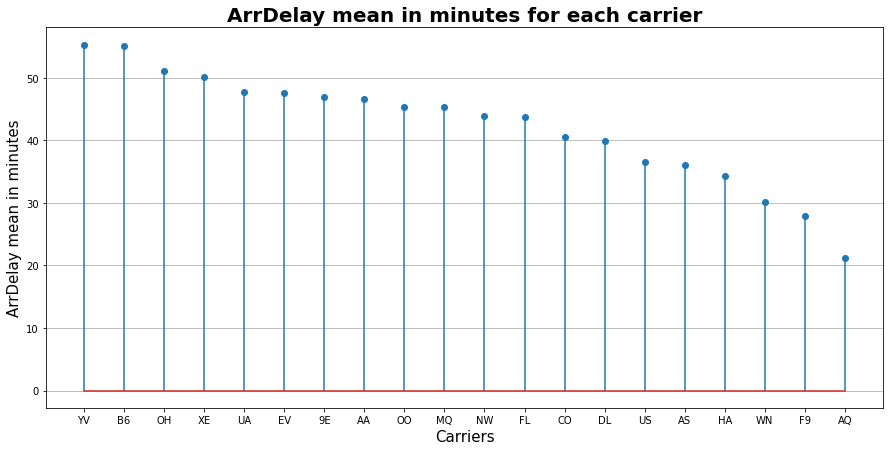

In [9]:
fig, ax = plt.subplots(figsize=(15,7))

ax.stem(arrdelay_mean.UniqueCarrier, arrdelay_mean.ArrDelay)

ax.set_title("ArrDelay mean in minutes for each carrier", fontsize="20", weight="bold")

ax.grid(axis="y")

ax.set_xlabel("Carriers", fontsize="15")

ax.set_ylabel("ArrDelay mean in minutes", fontsize="15")

plt.savefig('Fig 05. ArrDelay mean in minutes for each carrier Lollipop - Matplotlib.png')

plt.show()

Bar plot of ArrDelay mean for each carrier **Seaborn**

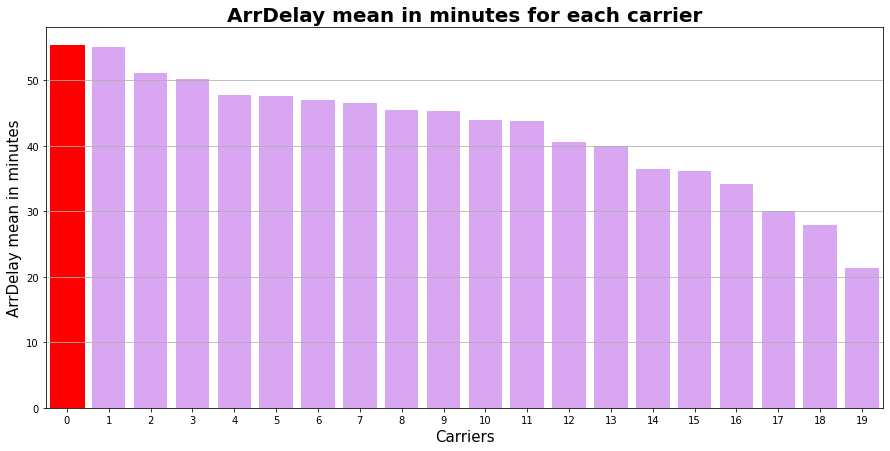

In [10]:
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.barplot(x=arrdelay_mean.index, y="ArrDelay", data = arrdelay_mean, palette = ["#dd99ff"])

ax.set_title("ArrDelay mean in minutes for each carrier", fontsize="20", weight="bold")

ax.grid(axis="y")

ax.get_children()[0].set_color("r")

ax.set_xlabel("Carriers", fontsize="15")

ax.set_ylabel("ArrDelay mean in minutes", fontsize="15")

plt.savefig('Fig 06. ArrDelay mean in minutes for each carrier Bar plot - Seaborn.png')

plt.show()

Sum of all ArrDealy minutes for carrier **Matplotlib**

In [11]:
arrdelay_sum = df[["UniqueCarrier", "ArrDelay"]].groupby("UniqueCarrier").sum().sort_values(by="ArrDelay").reset_index()

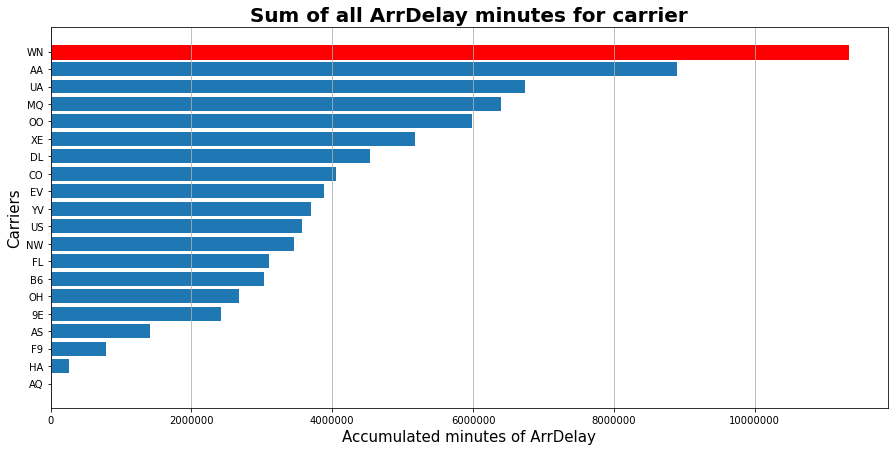

In [12]:
fig, ax = plt.subplots(figsize=(15,7))

ax.barh(arrdelay_sum["UniqueCarrier"], arrdelay_sum["ArrDelay"])

ax.set_title("Sum of all ArrDelay minutes for carrier", fontsize="20", weight="bold")

ax.grid(axis="x")

ax.get_children()[19].set_color("r")

ax.set_xlabel("Accumulated minutes of ArrDelay", fontsize="15")

ax.set_ylabel("Carriers", fontsize="15")

ax.ticklabel_format(style="plain", axis="x")

plt.savefig('Fig 07. Sum of all ArrDelay minutes for carrier.png')

plt.show()

#### ArrDelay mean per month of the 5 carriers with the largest ArrDelay mean

In [13]:
month_arrdelay = df[["Month", "UniqueCarrier", "ArrDelay"]][df.UniqueCarrier.isin(arrdelay_mean.UniqueCarrier[:5])].groupby(["Month", "UniqueCarrier"])["ArrDelay"].mean()

In [14]:
m = month_arrdelay.reset_index()
m["Month"] = pd.to_datetime(m['Month'], format='%m').dt.month_name()

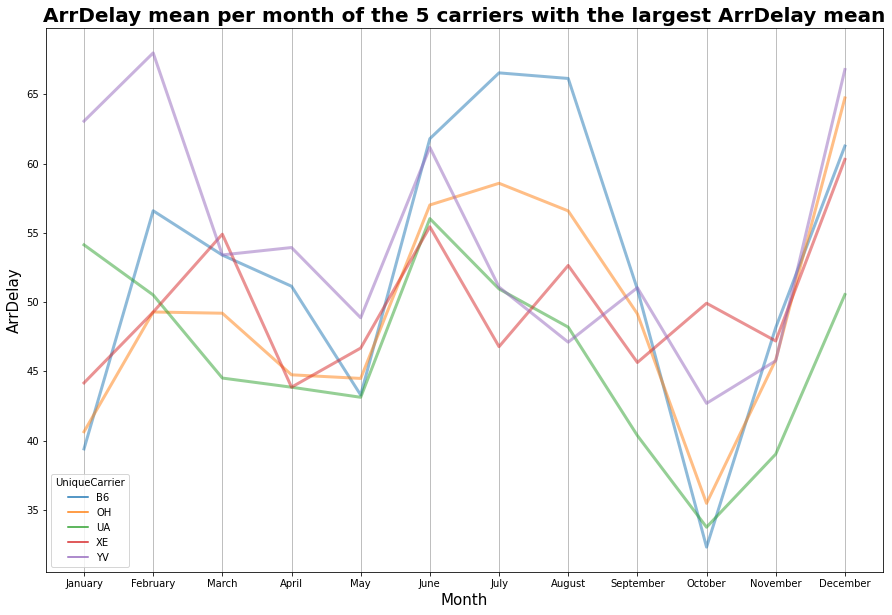

In [15]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.lineplot(x = "Month",
                 y = "ArrDelay",
                 hue = "UniqueCarrier", data = m, lw=3, alpha=0.5)

ax.grid(axis="x")

ax.set_title("ArrDelay mean per month of the 5 carriers with the largest ArrDelay mean", fontsize="20", weight="bold")

ax.set_xlabel("Month", fontsize="15")

ax.set_ylabel("ArrDelay", fontsize="15")

plt.savefig('Fig 08. ArrDelay mean per month of the 5 carriers with the largest ArrDelay mean.png')

plt.show()

### Two numerical variables (ArrDelay and DepDelay)

Use of a scatter plot to see the relation between the 2 variables.

In [16]:
arr_dep_delay = df[["ArrDelay", "DepDelay", "UniqueCarrier"]]

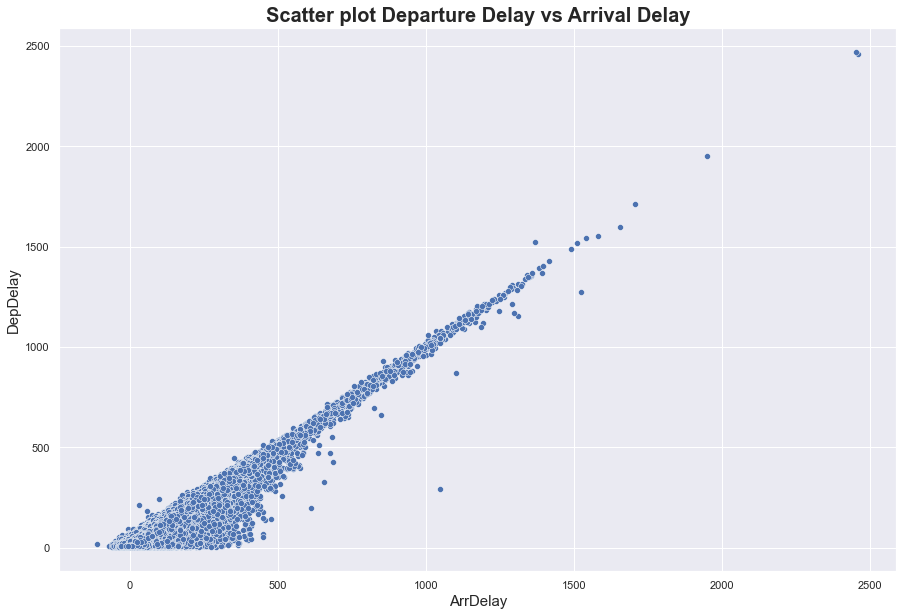

In [17]:
sns.set(style="darkgrid")

plt.figure(figsize = (15,10))

ax = sns.scatterplot(x="ArrDelay", y="DepDelay", data = arr_dep_delay)

ax.set_title("Scatter plot Departure Delay vs Arrival Delay", fontsize="20", weight="bold")

ax.set_xlabel("ArrDelay", fontsize="15")

ax.set_ylabel("DepDelay", fontsize="15")

plt.savefig('Fig 09. ArrDelay mean per month of the 5 carriers with the largest ArrDelay mean.png')

plt.show()

### Three variables (ArrDelay, DepDelay and UniqueCarrier)

I use a line plot to show the mean of arrival and departure delays per month for different carriers

In [18]:
month_arrdepdelay = df[["Month", "UniqueCarrier", "ArrDelay", "DepDelay"]].groupby(["Month", "UniqueCarrier"]).agg(
    DepDelayMean = pd.NamedAgg(column="DepDelay", aggfunc=np.mean),
    ArrDelayMean = pd.NamedAgg(column="ArrDelay", aggfunc=np.mean)
)
month_arrdepdelay = month_arrdepdelay.reset_index()
month_arrdepdelay["Month"] = pd.to_datetime(month_arrdepdelay['Month'], format='%m').dt.month_name().str.slice(stop=3)

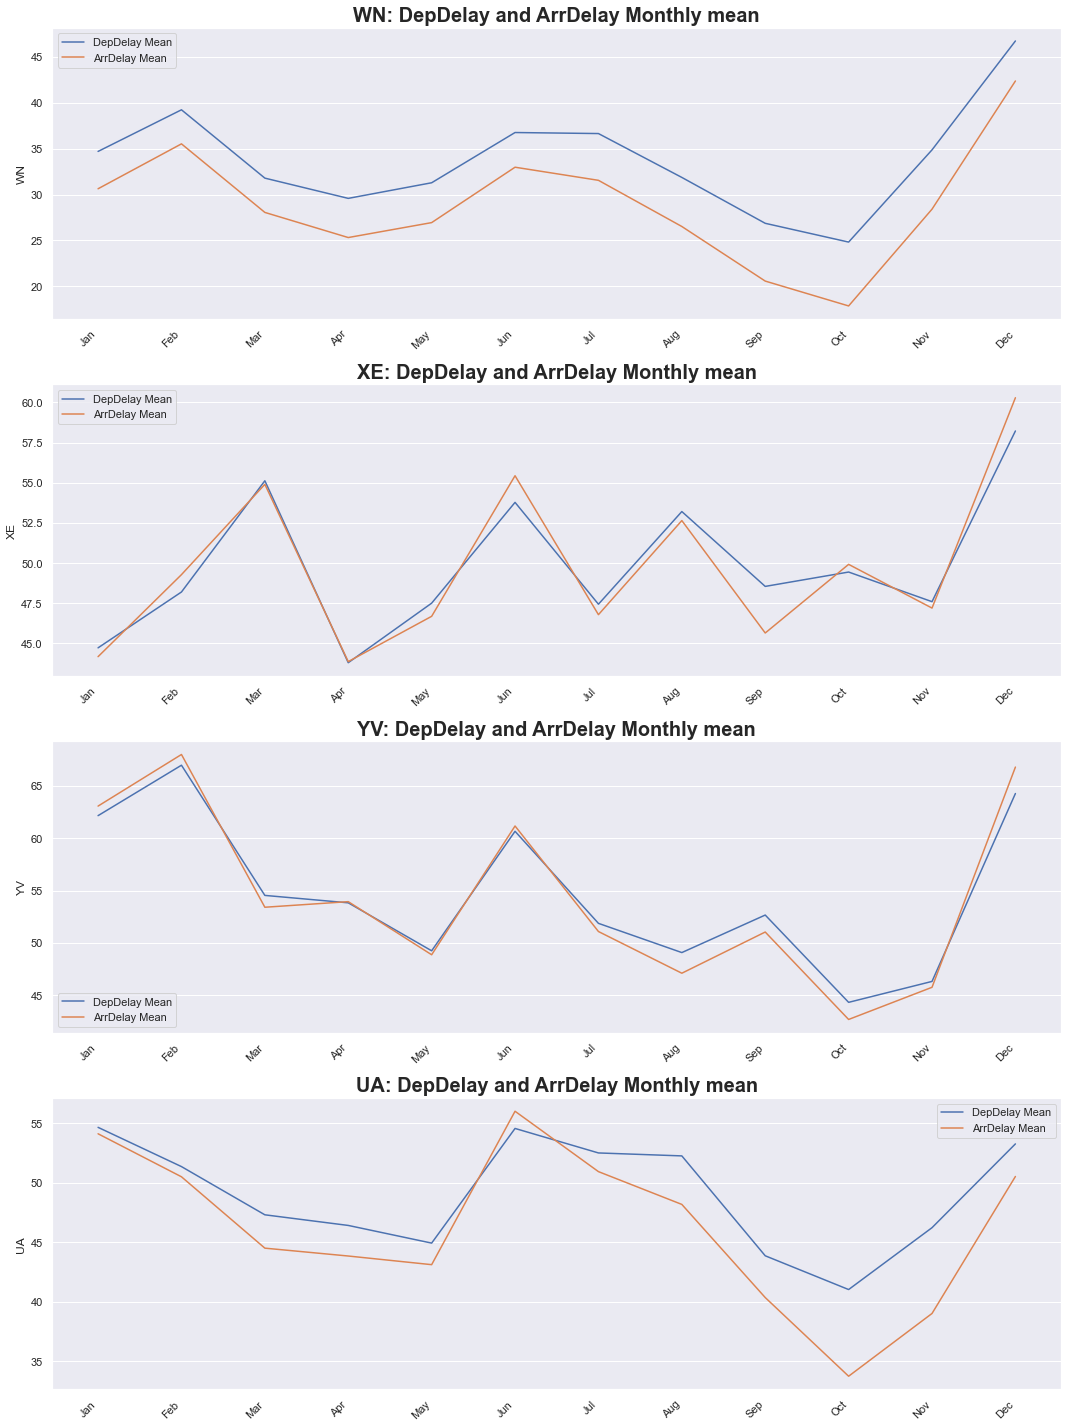

In [19]:
carrier = ["WN", "XE", "YV", "UA"]

def show_monthly_mean_arr_dep_delay(carrier):
    rows = len(carrier)
    
    fig, axes = plt.subplots(rows, 1, figsize=(15,(rows+1) * 4))
    
    for row, c in enumerate(carrier):
        
        plt.grid(axis="x")
        
        new_df = month_arrdepdelay[month_arrdepdelay["UniqueCarrier"] == c]
    
        sns.lineplot(ax=axes[row], x="Month", y="DepDelayMean", data=new_df)
        sns.lineplot(ax=axes[row], x="Month", y="ArrDelayMean", data=new_df)
        
        axes[row].set_title("{}: DepDelay and ArrDelay Monthly mean".format(c), fontsize="20", weight="bold")
        axes[row].grid(axis="x")
        
        axes[row].set(ylabel=c, xlabel=None)
        axes[row].legend(["DepDelay Mean", "ArrDelay Mean"])        
        
        labels = axes[row].get_xticklabels()
        plt.setp(labels, rotation=45, horizontalalignment="right")      
        
    plt.tight_layout()
    
    plt.savefig('Fig 10. DepDelay and ArrDelay Monthly mean.png')
    
    plt.show()
    
show_monthly_mean_arr_dep_delay(carrier)

Scatter plot of the ArrDelay and DepDelay for 4 different carriers

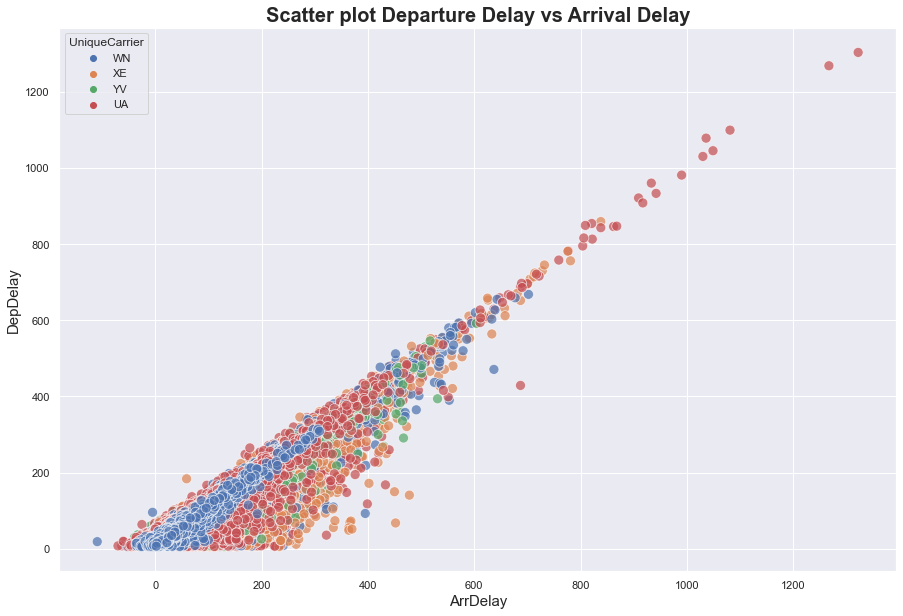

In [20]:
plt.figure(figsize = (15,10))

ax = sns.scatterplot(x="ArrDelay", y="DepDelay", hue="UniqueCarrier", 
                     data = arr_dep_delay[arr_dep_delay["UniqueCarrier"].isin(carrier)],
                    s = 100, alpha = 0.7)

ax.set_title("Scatter plot Departure Delay vs Arrival Delay", fontsize="20", weight="bold")

ax.set_xlabel("ArrDelay", fontsize="15")

ax.set_ylabel("DepDelay", fontsize="15")

plt.savefig('Fig 11. Scatter plot Departure Delay vs Arrival Delay.png')

plt.show()

#### More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier)

I use a scatter plot to show the realtion between arrival and departure delays of a carrier. I create 3 bins / categories to classify the airtime of the flights: short, medium, long. I use this new information to apply it to the dots showing the arrival / departure delay relation. 

In [21]:
df3 = df[["UniqueCarrier", "ArrDelay", "DepDelay", "AirTime"]]

In [22]:
cut_labels_3 = ["short", "medium", "long"]
cut_bins = [0, 180, 360, df3["AirTime"].max()]
df3["AirTimeBins"] = pd.cut(df3['AirTime'], bins=cut_bins, labels=cut_labels_3)

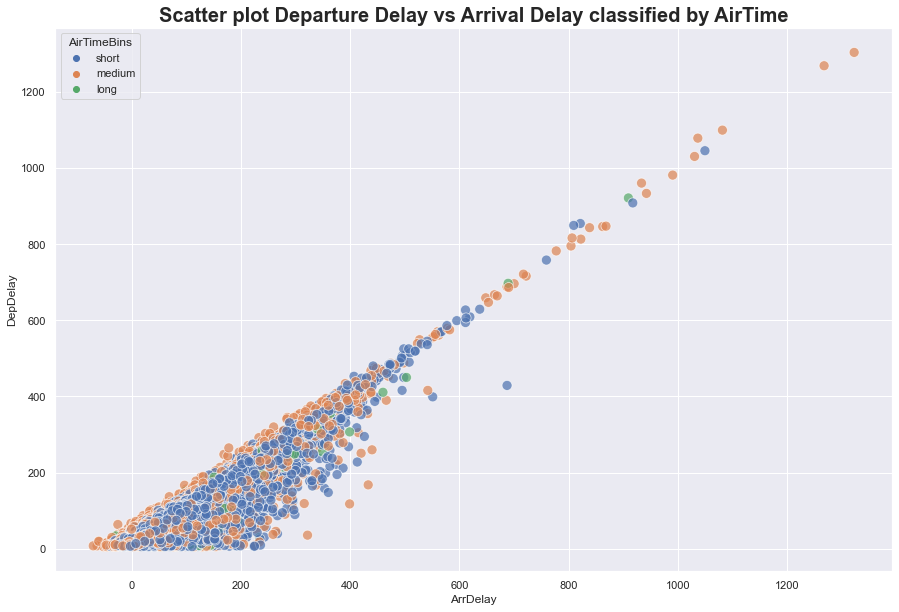

In [23]:
carrier = "UA"

subset = df3[df3["UniqueCarrier"] == carrier]

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.scatterplot(x = "ArrDelay", y = "DepDelay", hue="AirTimeBins", 
                     s = 100, alpha = 0.7, data = subset)

ax.set_title("Scatter plot Departure Delay vs Arrival Delay classified by AirTime", fontsize="20", weight="bold")

plt.savefig('Fig 12. Scatter plot Departure Delay vs Arrival Delay classified by AirTime.png')

plt.show()

## Exercici 2

Exporta els gràfics com imatges o com html.

## Exercici 3

Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.